# User Churn Risk detection using classification machine learning model

https://developer.ibm.com/learningpaths/learning-path-machine-learning-for-developers

**1. Import libraries**

In [67]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
import matplotlib as mpl
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier

**2. Load data to DataFrame**

In [17]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/IBM/ml-learning-path-assets/master/data/mergedcustomers_missing_values_GENDER.csv")
df.head()

,ID,CHURNRISK,GENDER,STATUS,CHILDREN,ESTINCOME,HOMEOWNER,AGE,TOTALDOLLARVALUETRADED,TOTALUNITSTRADED,LARGESTSINGLETRANSACTION,SMALLESTSINGLETRANSACTION,PERCENTCHANGECALCULATION,DAYSSINCELASTLOGIN,DAYSSINCELASTTRADE,NETREALIZEDGAINS_YTD,NETREALIZEDLOSSES_YTD
0,1703,Medium,NaN,M,2,28766.9,N,47,6110.61,58,1527.6525,152.76525,8.70,2,13,0.0000,152.76525
1,1704,Low,NaN,M,2,91272.2,Y,25,26992.70,13,13496.3500,1349.63500,3.25,4,10,1349.6350,0.00000
2,1705,Low,NaN,S,0,73228.3,N,42,22472.25,28,11236.1250,1123.61250,7.00,4,5,1123.6125,0.00000
3,1706,High,M,M,1,64792.3,N,52,13051.31,36,6525.6550,652.56550,9.00,3,6,0.0000,652.56550
4,1707,High,F,S,0,93322.1,Y,40,29922.99,8,14961.4950,1496.14950,2.00,4,9,0.0000,1496.14950


**3. Data Analysis**

In [18]:
print('Columns:')
print('_' * 36)
print(df.dtypes)
print('_' * 36)
print('Null values:')
print('_' * 36)
print(df.isnull().sum())
print('_' * 36)
print(f"Duplicate rows: {df.duplicated().sum()}")

Columns:
____________________________________
ID                             int64
CHURNRISK                     object
GENDER                        object
STATUS                        object
CHILDREN                       int64
ESTINCOME                    float64
HOMEOWNER                     object
AGE                            int64
TOTALDOLLARVALUETRADED       float64
TOTALUNITSTRADED               int64
LARGESTSINGLETRANSACTION     float64
SMALLESTSINGLETRANSACTION    float64
PERCENTCHANGECALCULATION     float64
DAYSSINCELASTLOGIN             int64
DAYSSINCELASTTRADE             int64
NETREALIZEDGAINS_YTD         float64
NETREALIZEDLOSSES_YTD        float64
dtype: object
____________________________________
Null values:
____________________________________
ID                           0
CHURNRISK                    0
GENDER                       3
STATUS                       0
CHILDREN                     0
ESTINCOME                    0
HOMEOWNER                    0
AGE    

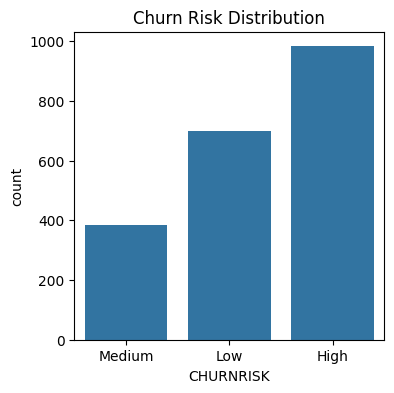

In [19]:
plt.figure(figsize=(4, 4))
sns.countplot(x='CHURNRISK', data=df)
plt.title('Churn Risk Distribution')
plt.show()

**3. Data preparation**

In [20]:
# Remove redundant colums
df.drop(columns=['ID'], inplace=True)
df.head()

,CHURNRISK,GENDER,STATUS,CHILDREN,ESTINCOME,HOMEOWNER,AGE,TOTALDOLLARVALUETRADED,TOTALUNITSTRADED,LARGESTSINGLETRANSACTION,SMALLESTSINGLETRANSACTION,PERCENTCHANGECALCULATION,DAYSSINCELASTLOGIN,DAYSSINCELASTTRADE,NETREALIZEDGAINS_YTD,NETREALIZEDLOSSES_YTD
0,Medium,NaN,M,2,28766.9,N,47,6110.61,58,1527.6525,152.76525,8.70,2,13,0.0000,152.76525
1,Low,NaN,M,2,91272.2,Y,25,26992.70,13,13496.3500,1349.63500,3.25,4,10,1349.6350,0.00000
2,Low,NaN,S,0,73228.3,N,42,22472.25,28,11236.1250,1123.61250,7.00,4,5,1123.6125,0.00000
3,High,M,M,1,64792.3,N,52,13051.31,36,6525.6550,652.56550,9.00,3,6,0.0000,652.56550
4,High,F,S,0,93322.1,Y,40,29922.99,8,14961.4950,1496.14950,2.00,4,9,0.0000,1496.14950


In [21]:
# Enum Columns preparation
enumColumns = ['GENDER', 'STATUS', 'HOMEOWNER']
enumPipe = Pipeline( steps=[
    ('impute', SimpleImputer(strategy="most_frequent")),
    ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
])
print(f"Enum columns : {enumColumns}")

Enum columns : ['GENDER', 'STATUS', 'HOMEOWNER']


In [22]:
# Numerical Columns
numericColumns = df.select_dtypes(include=['float','int']).columns
numericPipe = Pipeline( steps=[('scale', StandardScaler())] )
print(f"Numerical columns : {numericColumns}")

Numerical columns : Index(['CHILDREN', 'ESTINCOME', 'AGE', 'TOTALDOLLARVALUETRADED',
       'TOTALUNITSTRADED', 'LARGESTSINGLETRANSACTION',
       'SMALLESTSINGLETRANSACTION', 'PERCENTCHANGECALCULATION',
       'DAYSSINCELASTLOGIN', 'DAYSSINCELASTTRADE', 'NETREALIZEDGAINS_YTD',
       'NETREALIZEDLOSSES_YTD'],
      dtype='object')


In [23]:
# preprocessor for all columns
preprocColumns = ColumnTransformer(transformers=[
    ('enum', enumPipe, enumColumns),
    ('numeric', numericPipe, numericColumns)
], remainder="passthrough")
preprocColumns.set_output(transform='pandas')

ColumnTransformer(remainder='passthrough',
                  transformers=[('enum',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['GENDER', 'STATUS', 'HOMEOWNER']),
                                ('numeric',
                                 Pipeline(steps=[('scale', StandardScaler())]),
                                 Index(['CHILDREN', 'ESTINCOME', 'AGE', 'TOTALDOLLARVALUETRADED',
       'TOTALUNITSTRADED', 'LARGESTSINGLETRANSACTION',
       'SMALLESTSINGLETRANSACTION', 'PERCENTCHANGECALCULATION',
       'DAYSSINCELASTLOGIN', 'DAYSSINCELASTTRADE', 'NETREALIZEDGAINS_YTD',
       'NETREALIZEDLOSSES_YTD'],
      dtype='object'))])

In [29]:
# preprocessed features
features = preprocColumns.fit_transform(df.drop(columns=['CHURNRISK']))
print("Features:")
features.head()

Features:


,enum__GENDER_F,enum__GENDER_M,enum__STATUS_D,enum__STATUS_M,enum__STATUS_S,enum__HOMEOWNER_N,enum__HOMEOWNER_Y,numeric__CHILDREN,numeric__ESTINCOME,numeric__AGE,numeric__TOTALDOLLARVALUETRADED,numeric__TOTALUNITSTRADED,numeric__LARGESTSINGLETRANSACTION,numeric__SMALLESTSINGLETRANSACTION,numeric__PERCENTCHANGECALCULATION,numeric__DAYSSINCELASTLOGIN,numeric__DAYSSINCELASTTRADE,numeric__NETREALIZEDGAINS_YTD,numeric__NETREALIZEDLOSSES_YTD
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.012959,-0.738588,0.281434,-1.011294,-0.010312,-1.168367,-1.168367,-0.332917,-0.602899,0.857719,-0.679273,-0.510607
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.012959,1.290924,-1.193460,1.094057,-0.790986,1.084439,1.084439,-0.723373,0.732138,0.151724,1.835463,-0.795935
2,1.0,0.0,0.0,0.0,1.0,1.0,0.0,-1.359800,0.705049,-0.053769,0.638301,-0.530761,0.659009,0.659009,-0.454710,0.732138,-1.024934,1.414322,-0.795935
3,0.0,1.0,0.0,1.0,0.0,1.0,0.0,-0.173420,0.431137,0.616638,-0.311526,-0.391974,-0.227619,-0.227619,-0.311424,0.064619,-0.789603,-0.679273,0.422898
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,-1.359800,1.357483,-0.187850,1.389491,-0.877727,1.360216,1.360216,-0.812928,0.732138,-0.083608,-0.679273,1.998506


In [34]:
#preprocessed labels
  # preprocLabelAsEnum = ColumnTransformer(transformers=[
  #     ('enum', enumPipe, ['CHURNRISK'])
  # ])
  # preprocLabelAsEnum.set_output(transform='pandas')
  # labelEnum = preprocLabelAsEnum.fit_transform(df[['CHURNRISK']])
  # labelEnum.head()

  # labelEnc = LabelEncoder().fit(df['CHURNRISK'])
  # print(labelEnc.classes_)

# Mapping dictionary
risk_mapping = {'Low': 0, 'Medium': 1, 'High': 2}
label = pd.DataFrame(data=df['CHURNRISK'].map(risk_mapping), columns=['CHURNRISK'])
label.head()

,CHURNRISK
0,1
1,0
2,0
3,2
4,2


**4. Visualization of input data**

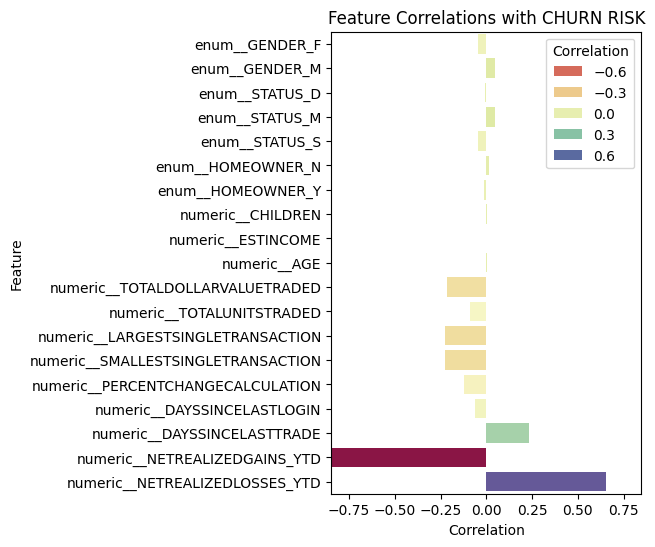

In [36]:
# Vizualize features Correlations with label
featuresToLabelCorr = features.corrwith(label['CHURNRISK'])
#print(featuresToLabelCorr)
corr_df = featuresToLabelCorr.reset_index()
corr_df.columns = ['Feature', 'Correlation']
# Plotting the bar plot
plt.figure(figsize=(4, 6))
sns.barplot(data=corr_df, x='Correlation', y='Feature', orient='h', hue='Correlation', palette="Spectral")
plt.title('Feature Correlations with CHURN RISK')
maxAmp = max(abs(min(featuresToLabelCorr)), abs(max(featuresToLabelCorr)))
plt.xlim(-maxAmp, maxAmp)
plt.show()

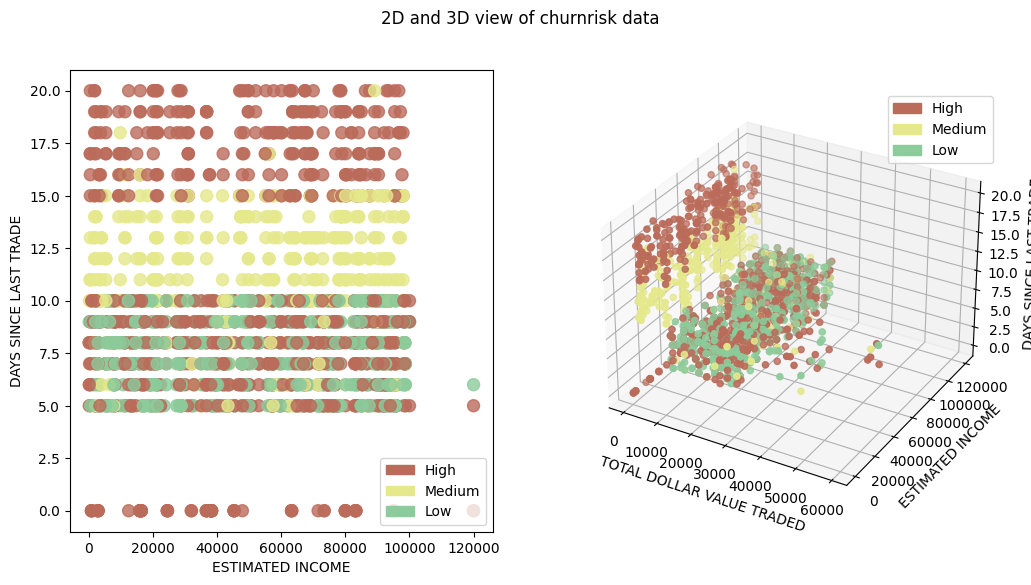

In [48]:
# Another vizualisation
area = 75
x = df['ESTINCOME']
y = df['DAYSSINCELASTTRADE']
z = df['TOTALDOLLARVALUETRADED']

pop_a = mpatches.Patch(color='#BB6B5A', label='High')
pop_b = mpatches.Patch(color='#E5E88B', label='Medium')
pop_c = mpatches.Patch(color='#8CCB9B', label='Low')
def colormap(risk_list):
    cols=[]
    for l in risk_list:
        if l==0:
            cols.append('#8CCB9B')
        elif l==2:
            cols.append('#BB6B5A')
        elif l==1:
            cols.append('#E5E88B')
    return cols

fig = plt.figure(figsize=(12,6))
fig.suptitle('2D and 3D view of churnrisk data')

# First subplot
ax = fig.add_subplot(1, 2,1)

ax.scatter(x, y, alpha=0.8, c=colormap(label['CHURNRISK']), s= area)
ax.set_ylabel('DAYS SINCE LAST TRADE')
ax.set_xlabel('ESTIMATED INCOME')

plt.legend(handles=[pop_a,pop_b,pop_c])

# Second subplot
ax = fig.add_subplot(1,2,2, projection='3d')

ax.scatter(z, x, y, c=colormap(label['CHURNRISK']), marker='o')

ax.set_xlabel('TOTAL DOLLAR VALUE TRADED')
ax.set_ylabel('ESTIMATED INCOME')
ax.set_zlabel('DAYS SINCE LAST TRADE')

plt.legend(handles=[pop_a,pop_b,pop_c])

plt.show()

**5. Split data to training and test**

In [52]:
X_train, X_test, y_train, y_test = train_test_split(features, label, random_state=0)
print(f"Training data dimensions : features {X_train.shape} label {y_train.shape}")
print(f"Test data dimensions : features {X_test.shape} label {y_test.shape}")

Training data dimensions : features (1549, 19) label (1549, 1)
Test data dimensions : features (517, 19) label (517, 1)


**6. Train model**

In [55]:
model = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
model.fit(X_train,y_train)

  # # Column Preparation Pipeline can include model and be fitted to data together
  # randomForestClassifier = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
  # rfc_model = Pipeline(steps=[('preprocessorAll',preprocColumns),('classifier', randomForestClassifier)])

<ipython-input-55-692776929f42>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,y_train)


RandomForestClassifier(max_depth=2, random_state=0)

**7. Predict**

In [56]:
y_pred = model.predict(X_test)

**8. Evaluate**

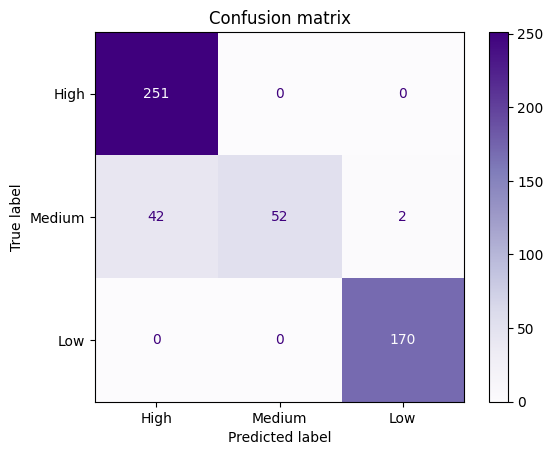

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       170
           1       1.00      0.54      0.70        96
           2       0.86      1.00      0.92       251

    accuracy                           0.91       517
   macro avg       0.95      0.85      0.87       517
weighted avg       0.93      0.91      0.91       517



In [78]:
# Confusion matrix
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, cmap='Purples',
    display_labels=list(reversed(risk_mapping.keys())),
    labels=list(reversed(risk_mapping.values())) )
plt.title('Confusion matrix')
plt.show()
print(classification_report(y_test,y_pred))

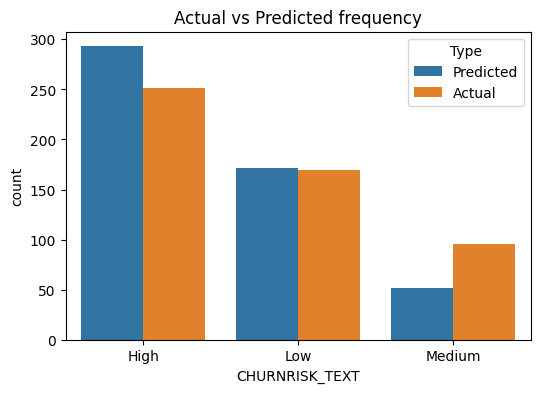

In [125]:
# Compare Actual vs Predicted
risk_reverse_mapping = {0: "Low", 1: "Medium", 2: "High"}
y_pred_temp = pd.DataFrame({'CHURNRISK': y_pred, 'Type': 'Predicted'})
y_comparison = pd.concat([y_pred_temp, y_test.assign(Type='Actual')], ignore_index=True)
y_comparison['CHURNRISK_TEXT'] = y_comparison['CHURNRISK'].map(lambda x: risk_reverse_mapping[x])
# Plot
plt.figure(figsize=(6, 4))
sns.countplot(data=y_comparison, x="CHURNRISK_TEXT", hue="Type")
plt.title('Actual vs Predicted frequency')
plt.show()